<a href="https://colab.research.google.com/github/danielaquaries20/ML-A11.2023.15003-UAS/blob/main/A11202315003_PREDIKSI_HARGA_LAPTOP_PM_UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Judul/Topik: MEMPREDIKSI HARGA LAPTOP BERDASARKAN SPESIFIKASI**

# IDENTITAS MAHASISWA
**NIM**       : A11.2023.15003

**Nama**      : Daniel Aquaries Pratama

**Kelompok**  : A11.4402



# **Ringkasan Project**

### A. Ringkasan dan Permasalahan

Di era digital, laptop menjadi kebutuhan utama, namun harganya sangat bervariasi meskipun spesifikasinya tampak serupa. Konsumen seringkali bingung karena sulit memahami hubungan kompleks antara komponen seperti RAM, CPU, GPU, penyimpanan, dan merek yang memengaruhi harga.

Oleh karena itu, proyek ini bertujuan untuk membangun model machine learning yang dapat memprediksi harga laptop secara akurat berdasarkan spesifikasi teknisnya. Model ini diharapkan dapat membantu konsumen menilai kewajaran harga dan membantu produsen dalam menentukan strategi harga yang kompetitif.



### B. Tujuan yang dicapai
- Membangun model yang dapat memprediksi harga laptop berdasarkan spesifikasinya seperti RAM, CPU, GPU, penyimpanan, dan merek.


### C. Model/Alur Penyelesaian (CRSIP DM)
1. **Business Understanding**: Memahami akar permasalahan pada suatu topik dan menentukan tujuan jelasnya. (pada poin A dan B)
2. **Data Understanding**: Mengenali datasets (laptop_data.csv) dan Mengidentifikasi data apakah ada data yang hilang atau tidak.
3. **Data Preparation**: Mengubah datasets (laptop_data.csv) yang merupakan data mentah menjadi dataset yang bersih dan terstruktur untuk siap diolah oleh algoritma *machine learning*.
4. **Modeling**: Menerapkan teknik pemodelan (Random Forest) untuk mencapai tujuan project.
5. **Evaluation**: Mengevaluasi sejauh mana model (Random Forest) yang dibangun untuk memenuhi tujuan bisnis



*Note*: Tahap **Deployment** belum diterapkan pada project ini


**Bagan Masing Masing Tahapan***
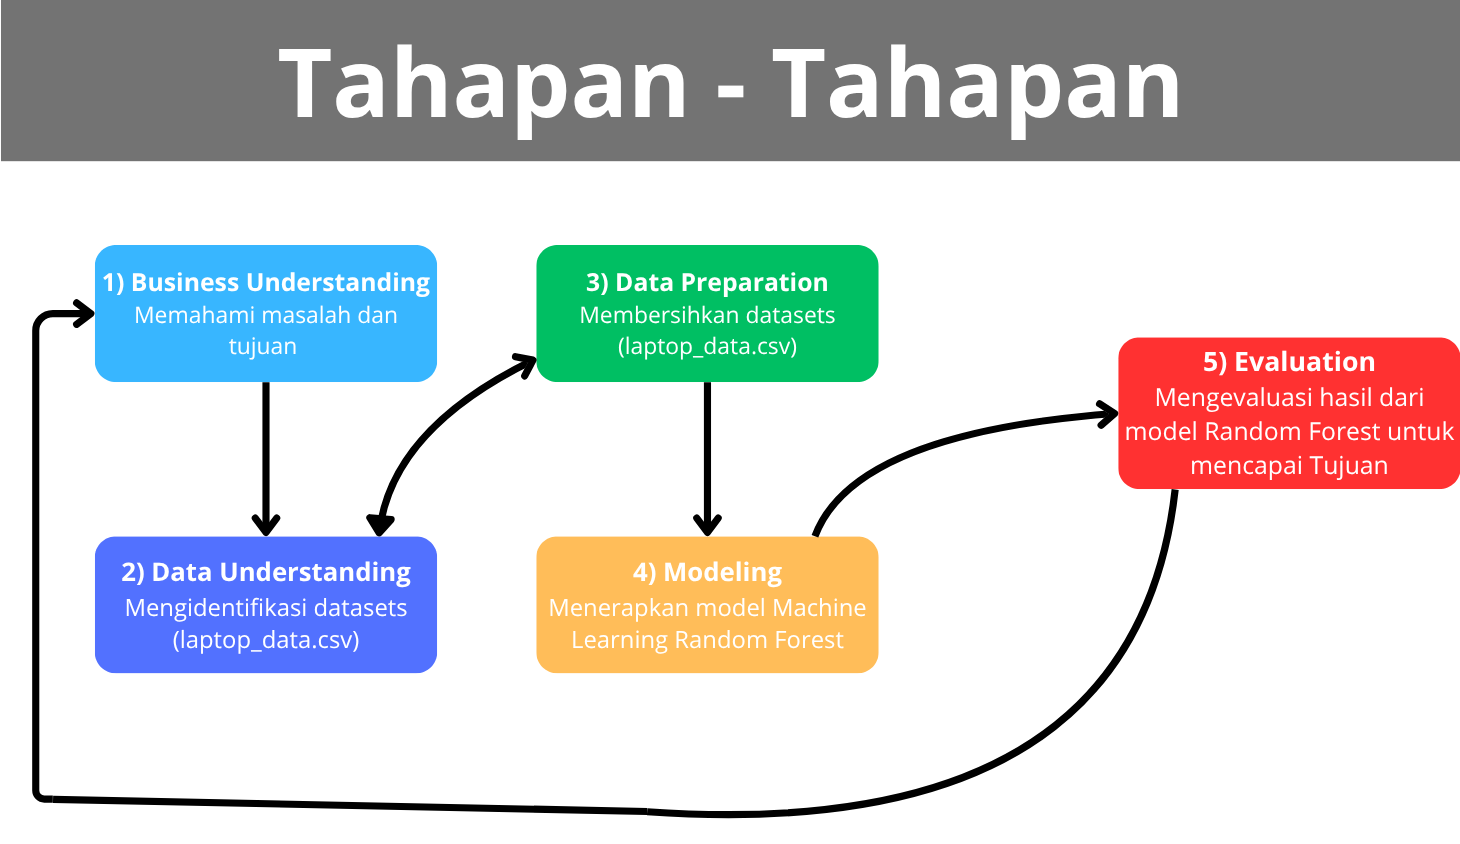

# **Penjelasan Datasets**

### A. Asal Datasets
Dataset diambil dari repository **publik** *Kaggle* berjudul "laptop_data.csv".

### B. Columns
1. Company- String -Laptop Manufacturer
2. TypeName -String -Type (Notebook, Ultrabook, Gaming, etc.)
3. Inches -Numeric- Screen Size
4. ScreenResolution -String- Screen Resolution
5. Cpu- String -Central Processing Unit (CPU)
6. Ram -String- Laptop RAM
7. Memory -String- Hard Disk / SSD Memory
8. GPU -String- Graphics Processing Units (GPU)
9. OpSys -String- Operating System
10. Weight -String- Laptop Weight
11. Price -Numeric- (Rupee)

*Note*: Kolom pertama merupakan data **id** tanpa keterangan. Sehingga awal kolom dimulai dari **company**.

### C. Feature Target
- Price -Numeric- (Rupee)

In [751]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Membaca file datasets. Disini saya mengirimkan datasets "laptop_data.csv" di folder "sample_data"

In [752]:
df = pd.read_csv('sample_data/laptop_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


Mengecek jumlah data dari dataset, dan didapati jumlahnya **1.303 data**

In [753]:
df.shape

(1303, 12)

In [754]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


Mengecek apakah ada data yang duplikat atau tidak, dan didapati **tidak ada** data duplikat.

In [755]:
df.duplicated().sum()

np.int64(0)

Mengecek apakah ada data yang null atau tidak, dan didapati **tidak ada** data yang null

In [756]:
df.isnull().sum()

,0
Unnamed: 0,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0


# **EDA & Proses Features Dataset**

Menghapus data *id* yang tidak ada keterangannya, disisi lain data *id* memang **tidak diperlukan** karena tidak mempengaruhi antar data.


In [757]:
df.drop(columns=['Unnamed: 0'], inplace=True)

*   Menghilangkan tulisan “GB” dan “kg” nya data milik Ram dan Weight.
*   Kemudian mengganti type datanya, untuk RAM jadi "Int", sedangkan
Wieght jadi "Float"

In [758]:
df['Ram'] = df['Ram'].str.replace('GB', '')
df['Weight'] = df['Weight'].str.replace('kg', '')

In [759]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [760]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


Memvisualisasikan jumlah masing masing data **Company**

<Axes: xlabel='Company'>

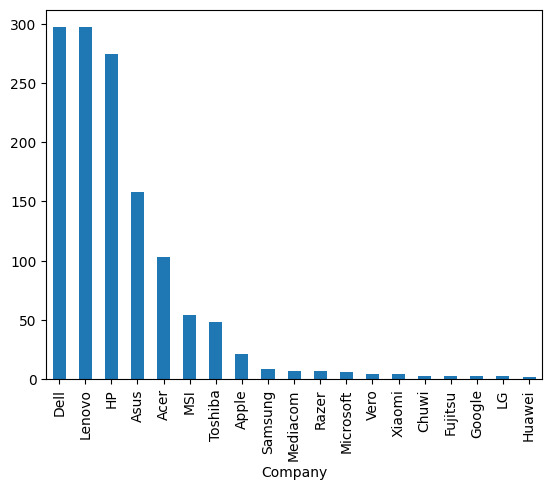

In [761]:
df['Company'].value_counts().plot(kind  = 'bar')

*   Memvisualisasikan data hubungan antara data **company** dan **harga**
*   Didapati bahwa company "Razer" yang paling mahal.
*   Namun disisi lain company "Razer" sangat sedikit jumlah datanya.
*   Yang paling banyak "Dell" tapi, "Dell" tidak menunjukkan harga yang mahal.


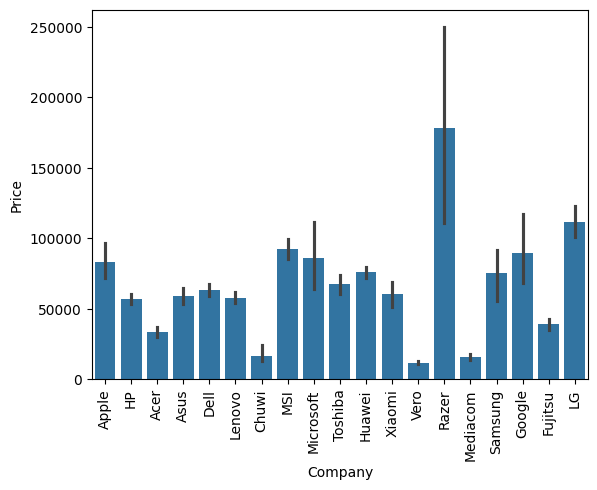

In [762]:
sns.barplot(x = df['Company'], y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

Memvisualisasikan jumlah masing masing data **TypeName**

<Axes: xlabel='TypeName'>

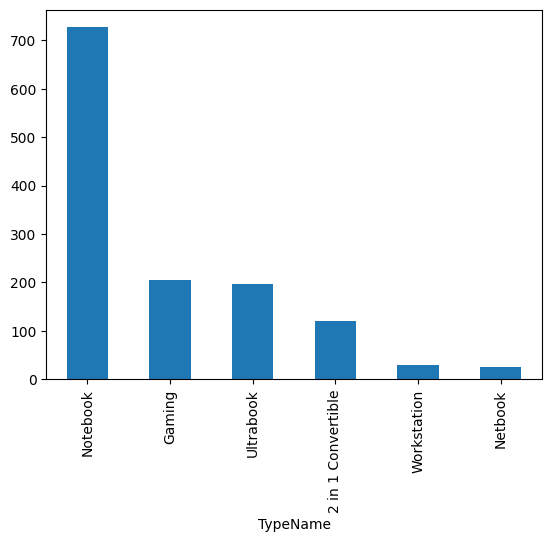

In [763]:
df['TypeName'].value_counts().plot(kind = 'bar')

*   Memvisualisasikan data hubungan antara data **TypeName** dan **Price**
*   Didapati bahwa type "Workstation" yang paling mahal.
*   Namun disi lain type "Workstation" paling sedikit jumlahnya.
*   Yang paling banyak type "Notebook", tapi "Notebook" tidak terlihat sangat mahal dari visualisis dibawah ini.



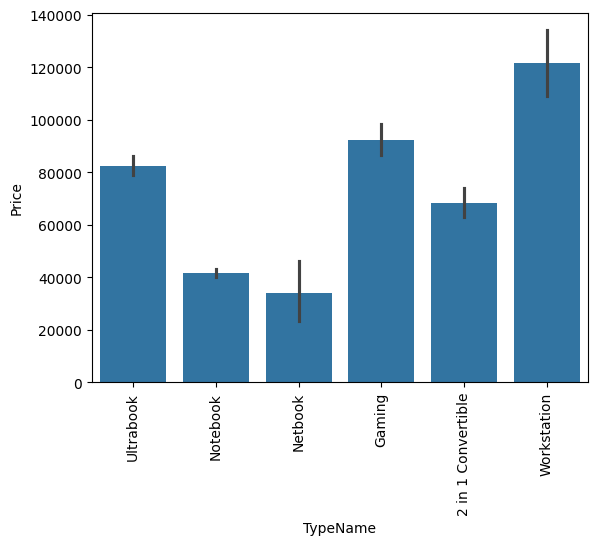

In [764]:
sns.barplot(x = df['TypeName'], y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

*   Memvisualisasikan hubungan data "Inches" dengan "Price"
*   Menunjukkan semakin tinggi angka dari data "Inches" maka semakin tinggi pula harganya.



<Axes: xlabel='Inches', ylabel='Price'>

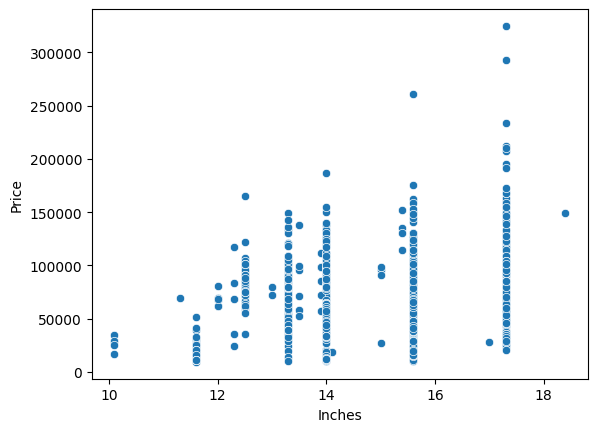

In [765]:
sns.scatterplot(x=df['Inches'], y=df['Price'])

*   Mengidentifikasi untuk data "ScreenResolution".
*   Didapati datanya memiliki jenis yang sangat banyak.

In [766]:
df['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,507
1366x768,281
IPS Panel Full HD 1920x1080,230
IPS Panel Full HD / Touchscreen 1920x1080,53
Full HD / Touchscreen 1920x1080,47
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


Membuat kolom baru “TouchScreen” dengan type Boolean dan mengisinya berdasarkan data dari kolom “ScreenResolution”

In [767]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

In [768]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
631,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.62,78801.1200,0
964,HP,Notebook,15.6,1366x768,Intel Core i5 7200U 2.50GHz,8,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04,45101.5200,0
461,Acer,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,128GB SSD,Intel HD Graphics 400,Windows 10,1.40,23176.8000,0
1008,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,1.64,55904.5728,0
814,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,AMD Radeon R5 M420,Windows 10,2.18,42081.0768,0


*   Memvisualisasika jumlah masing masing data "Touchsreen".
*   Disini imbalance, antara 1 dan 0 lebih banyak yang 0.



<Axes: xlabel='Touchscreen'>

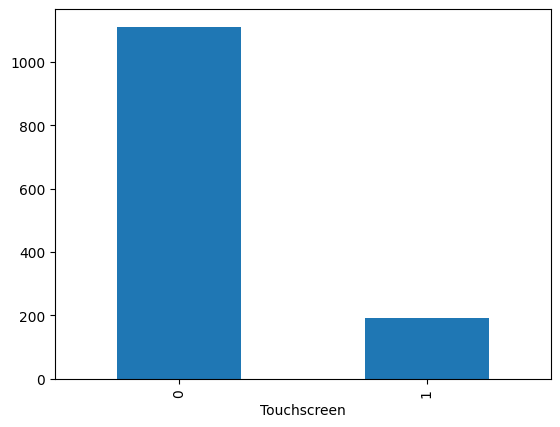

In [769]:
df['Touchscreen'].value_counts().plot(kind = 'bar')

*   Memvisualisasikan hubungan data "Touchsreen" dan "Price"
*   Disini didapati bahwa laptop yang memiliki fitur touchscreen harganya cenderung lebih mahal daripada yang tidak memiliki fitur touchscreen.



<Axes: xlabel='Touchscreen', ylabel='Price'>

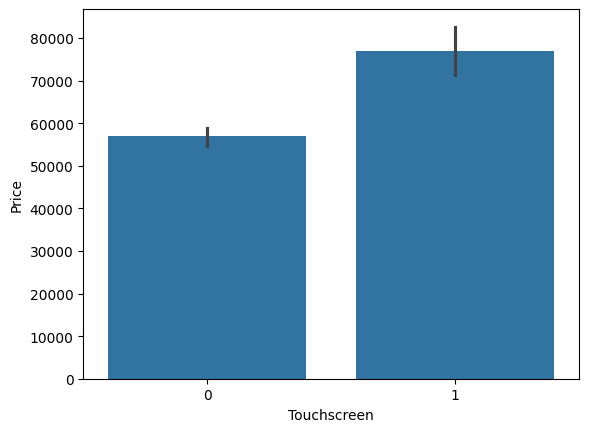

In [770]:
sns.barplot(x = df['Touchscreen'], y = df['Price'])

Membuat kolom baru “IPS” dengan type Boolean dan mengisinya berdasarkan data dari kolom “ScreenResolution”

*Note*: IPS (In-Plane Switching) adalah salah satu jenis teknologi panel layar yang membuat tampilan visual menjadi jauh lebih baik, terutama dalam hal warna dan sudut pandang.

In [771]:
df['Ips'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


Memvisualisasikan jumlah masing masing data "Ips".

<Axes: xlabel='Ips'>

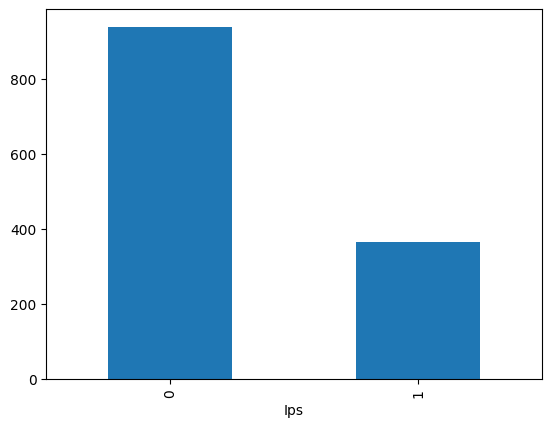

In [772]:
df['Ips'].value_counts().plot(kind = 'bar')

*   Memvisualisasikan hubungan data antara "Ips" dan "Price".
*   Didapati bahwa laptop yang memiliki fitur IPS maka harganya cenderung lebih mahal daripada laptop yang tidak memiliki fitur IPS.



<Axes: xlabel='Ips', ylabel='Price'>

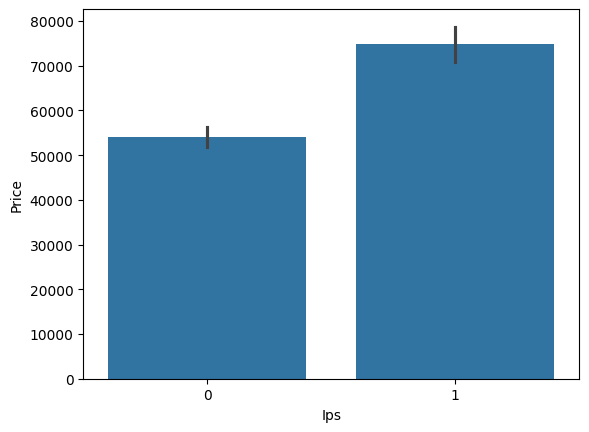

In [773]:
sns.barplot(x = df['Ips'], y = df['Price'])

Memisahkan data resolusi dengan membuat colomn baru yaitu X dan Y.

In [774]:
new = df['ScreenResolution'].str.split('x', n=1, expand=True)
df['X_res'] = new[0]
df['Y_res'] = new[1]
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
544,Asus,Notebook,15.6,1366x768,AMD E-Series 7110 1.8GHz,4,500GB HDD,AMD Radeon R2 Graphics,Windows 10,2.00,18594.7200,0,0,1366,768
132,Acer,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.60,47099.5200,0,1,IPS Panel Full HD 1920,1080
965,Dell,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4,1TB HDD,AMD Radeon R5 M430,Linux,2.25,24808.2336,0,0,1366,768
1171,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Intel UHD Graphics 620,Windows 10,2.10,61751.5200,0,0,Full HD 1920,1080
319,Acer,Notebook,11.6,1366x768,Intel Pentium Quad Core N3710 1.6GHz,4,128GB Flash Storage,Intel HD Graphics 405,Windows 10,1.40,25840.8000,0,0,1366,768


Sehingga hasilnya sebagai berikut

Sebagai contoh, didapati nilai X: 1920
dan nilai Y: 1080,
Maka resolusi layar untuk laptop tersebut adalah 1920 x 1080.


In [775]:
df['X_res'] = df['X_res'].str.replace(',', '').str.findall(r'(\d+\.?\d+)').apply(lambda x: x[0])
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


Mengubah tipe untuk column X dan Y menjadi "Int"

In [776]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [777]:
numeric_df = df.select_dtypes(include=np.number)
numeric_df.corr()['Price']

,Price
Inches,0.068197
Ram,0.743007
Weight,0.210370
Price,1.000000
Touchscreen,0.191226
Ips,0.252208
X_res,0.556529
Y_res,0.552809


In [778]:
df.drop(columns=['ScreenResolution'], inplace=True)
df.drop(columns=['Inches', 'X_res', 'Y_res'], inplace=True)
df['Cpu'].value_counts()

,count
Cpu,
Intel Core i5 7200U 2.5GHz,190
Intel Core i7 7700HQ 2.8GHz,146
Intel Core i7 7500U 2.7GHz,134
Intel Core i7 8550U 1.8GHz,73
Intel Core i5 8250U 1.6GHz,72
...,...
Intel Core i5 7200U 2.70GHz,1
Intel Core M M7-6Y75 1.2GHz,1
Intel Core M 6Y54 1.1GHz,1


In [779]:
df.head(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


Membuat kolom baru “CpuName” dengan type String dan mengisinya berdasarkan data 0-3 dari string data “Cpu”

In [780]:
df['CpuName'] = df['Cpu'].apply(lambda x: ' '.join(x.split()[0:3]))
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,CpuName
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,Intel Core i5


Mengkategorikan data Cpu menjadi:
- Intel Core i7
- Intel Core i5
- Intel Core i3
- Other Intel Processor
- AMD Processor

In [781]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel' :
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

df['CpuMerk'] = df['CpuName'].apply(fetch_processor)
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,CpuName,CpuMerk
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,Intel Core i5,Intel Core i5


- Memvisualisasikan jumlah masing masing data "CpuMerk".
- Dan didapati bahwa Intel Core i7 jumlahnya paling banyak.
- Selain itu dari gambar plot dapat disimpulkan bahwa Cpu bermerk Intel jumlahnya paling banyak daripada AMD.

<Axes: xlabel='CpuMerk'>

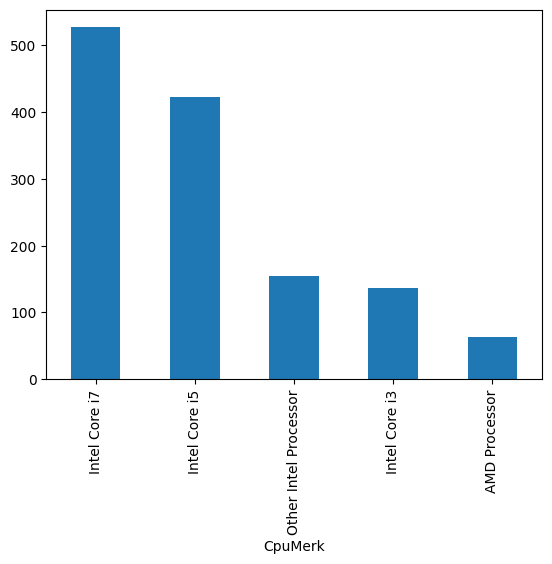

In [782]:
df['CpuMerk'].value_counts().plot(kind = 'bar')

- Memvisualisasikan hubungan data "CpuMerk" dengan data "Price"
- Didapati bahwa Intel Core i7 cenderung harganya paling mahal daripada CPU yang lain.

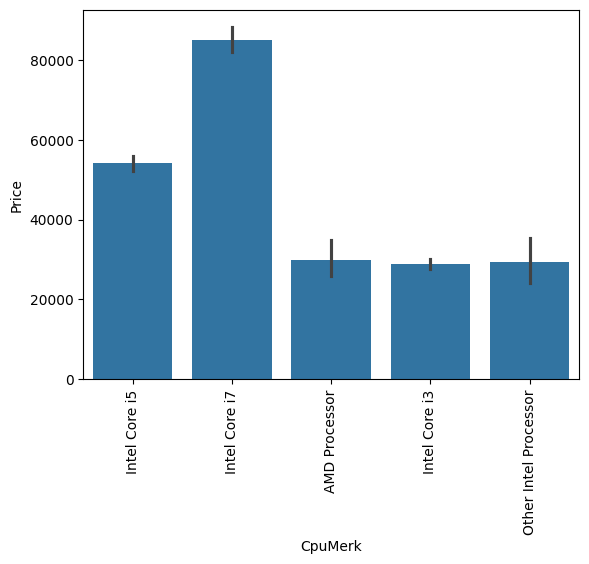

In [783]:
sns.barplot(x = df['CpuMerk'], y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

- Menghapus data "Cpu" dan "CpuName" karena sudah tidak dibutuhkan lagi.
- Sudah digantikan dengan data "CpuMerk"

In [784]:
df.drop(columns=['Cpu', 'CpuName'], inplace=True)
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,CpuMerk
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,Intel Core i5


- Memvisualisasikan jumlah masing masing data "Ram"
- Didapati bahwa paling banyak Laptop Ram 8.

<Axes: xlabel='Ram'>

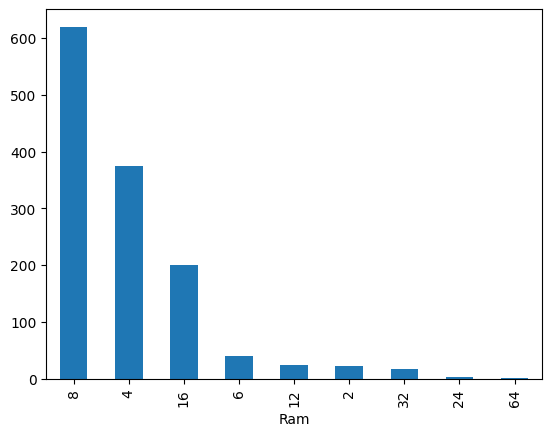

In [785]:
df['Ram'].value_counts().plot(kind = 'bar')

- Memvisualisasikan hubungan antara data "Ram" dengan data "Price".
- Tentunya semakin tinggi Ram nya semakin tinggi harganya, dan itu sesuai dari data yang divisusalisasikan.

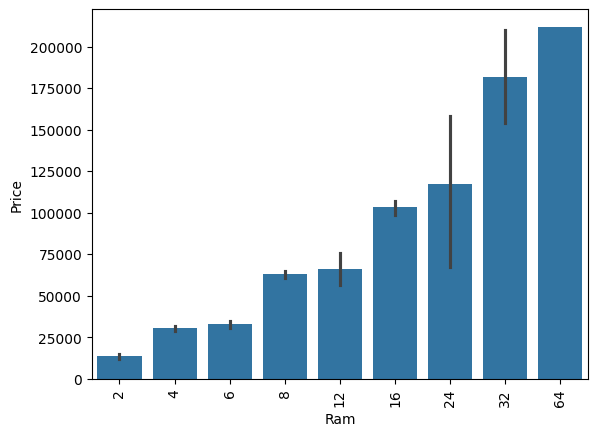

In [786]:
sns.barplot(x=df['Ram'], y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

- Mengidentifikasi data "Memory" atau data penyimpanan
- Dan didapati banyak jenisnya sehinggan perlu dilakukan pemisahan data.

In [787]:
df['Memory'].value_counts()

,count
Memory,
256GB SSD,412
1TB HDD,223
500GB HDD,132
512GB SSD,118
128GB SSD + 1TB HDD,94
128GB SSD,76
256GB SSD + 1TB HDD,73
32GB Flash Storage,38
2TB HDD,16


- Memproses data "Memory" dan memperjelaskan dengan membagi jadi 5 colomn baru yaitu "HDD", "SSD", "Hybrid", "Flashstorage".
- Sekalian dengan menghitung jumlah penyimpanannya dimasing masing column baru tersebut.

In [788]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df['Memory'] = df['Memory'].str.replace('GB', '')
df['Memory'] = df['Memory'].str.replace('TB', '000')
new = df['Memory'].str.split('+', n=1, expand=True)

df['First'] = new[0]
df['First'] = df['First'].str.strip()

df['Second'] = new[1]

df['Layer1HDD'] = df['First'].apply(lambda x: 1 if 'HDD' in x else 0)
df['Layer1SSD'] = df['First'].apply(lambda x: 1 if 'SSD' in x else 0)
df['Layer1Hybrid'] = df['First'].apply(lambda x: 1 if 'Hybrid' in x else 0)
df['Layer1FlashStorage'] = df['First'].apply(lambda x: 1 if 'Flash Storage' in x else 0)

df['First'] = df['First'].str.replace(r'\D', '', regex=True)

df['Second'].fillna('0', inplace=True)


df['Layer2HDD'] = df['Second'].apply(lambda x: 1 if 'HDD' in x else 0)
df['Layer2SSD'] = df['Second'].apply(lambda x: 1 if 'SSD' in x else 0)
df['Layer2Hybrid'] = df['Second'].apply(lambda x: 1 if 'Hybrid' in x else 0)
df['Layer2FlashStorage'] = df['Second'].apply(lambda x: 1 if 'Flash Storage' in x else 0)

df['Second'] = df['Second'].str.replace(r'\D', '', regex=True)

df['First'] = df['First'].astype(int)
df['Second'] = df['Second'].astype(int)

df['HDD'] = df['First'] * df['Layer1HDD'] + df['Second'] * df['Layer2HDD']
df['SSD'] = df['First'] * df['Layer1SSD'] + df['Second'] * df['Layer2SSD']
df['Hybrid'] = df['First'] * df['Layer1Hybrid'] + df['Second'] * df['Layer2Hybrid']
df['FlashStorage'] = df['First'] * df['Layer1FlashStorage'] + df['Second'] * df['Layer2FlashStorage']

df.sample(5)

/tmp/ipython-input-788-4001739031.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Second'].fillna('0', inplace=True)


,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,...,Layer1Hybrid,Layer1FlashStorage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2FlashStorage,HDD,SSD,Hybrid,FlashStorage
455,Dell,2 in 1 Convertible,4,500 HDD,Intel HD Graphics 405,Windows 10,1.47,25521.12,1,0,...,0,0,0,0,0,0,500,0,0,0
189,Dell,Notebook,8,128 SSD + 1000 HDD,AMD Radeon 530,Windows 10,2.80,57808.80,0,0,...,0,0,1,0,0,0,1000,128,0,0
991,HP,Notebook,4,128 SSD + 1000 HDD,AMD Radeon 520,Windows 10,2.10,26586.72,0,0,...,0,0,1,0,0,0,1000,128,0,0
72,Dell,Notebook,8,256 SSD,AMD Radeon 530,Windows 10,2.20,46353.60,0,0,...,0,0,0,0,0,0,0,256,0,0
871,Lenovo,Notebook,4,1000 HDD,AMD Radeon R5 M430,No OS,2.20,25521.12,0,0,...,0,0,0,0,0,0,1000,0,0,0


In [789]:
df.drop(columns=['First', 'Second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
                 'Layer1FlashStorage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid', 'Layer2FlashStorage'], inplace=True)

df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,CpuMerk,HDD,SSD,Hybrid,FlashStorage
1253,Lenovo,Notebook,8,256 SSD,Intel HD Graphics 520,Windows 10,1.900,57116.16,0,1,Intel Core i5,0,256,0,0
565,Dell,Ultrabook,8,128 SSD,Intel UHD Graphics 620,Windows 10,1.210,85194.72,1,1,Intel Core i5,0,128,0,0
650,Asus,Gaming,32,512 SSD,Nvidia GeForce GTX 1080,Windows 10,3.800,149130.72,0,1,Intel Core i7,0,512,0,0
252,Asus,Notebook,4,1000 HDD,AMD Radeon R5 M420,Windows 10,1.680,24988.32,0,0,AMD Processor,1000,0,0,0
1185,Asus,Gaming,8,256 SSD + 1000 HDD,Nvidia GeForce GTX 960M,Windows 10,2.591,48431.52,0,1,Intel Core i7,1000,256,0,0


Menghapus data "Memory" karena sudah tidak digunakan.

In [790]:
df.drop(columns=['Memory'], inplace=True)
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,CpuMerk,HDD,SSD,Hybrid,FlashStorage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,Intel Core i5,0,256,0,0


- Melihat korelasi antar data dengan data "Price"
- Karena data "Hybrid" dan "Flashstorage" tidak terlalu tinggi hubungannya maka dapat dihapus.

In [791]:
numeric_df = df.select_dtypes(include=np.number)
numeric_df.corr()['Price']

,Price
Ram,0.743007
Weight,0.210370
Price,1.000000
Touchscreen,0.191226
Ips,0.252208
HDD,-0.096441
SSD,0.670799
Hybrid,0.007989
FlashStorage,-0.040511


In [792]:
df.drop(columns=['Hybrid', 'FlashStorage'], inplace=True)

- Mengidentifikasi data "GPU".
- Dan didapati banyak jenisnya, maka perlu dilakukan penyesuaian kembali.

In [793]:
df['Gpu'].value_counts()

,count
Gpu,
Intel HD Graphics 620,281
Intel HD Graphics 520,185
Intel UHD Graphics 620,68
Nvidia GeForce GTX 1050,66
Nvidia GeForce GTX 1060,48
...,...
Nvidia Quadro M500M,1
AMD Radeon R7 M360,1
Nvidia Quadro M3000M,1


- Membuat kolom baru “GpuMerk” yang type data String dan diisi berdasarkan data string pertama (0) dari “Gpu”.
- Contoh string pertama "Intel" maka data "GpuMerk" adalah "Intel"

In [794]:
df['GpuMerk'] = df['Gpu'].apply(lambda x: x.split()[0])
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,CpuMerk,HDD,SSD,GpuMerk
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,Intel Core i5,0,256,Intel


- Melihat jumlah masing masing data "GpuMerk"
- Didapati bahwa merk "Intel" yang paling banyaj daripada merk lainnya.

In [795]:
df['GpuMerk'].value_counts()

,count
GpuMerk,
Intel,722
Nvidia,400
AMD,180
ARM,1


Menghapus data ARM, karena hanya ada 1 saja

In [796]:
df = df[df['GpuMerk'] != 'ARM']

- Memvisualisasikan hubungan antara data "GpuMerk" dengan data "Price".
- Dan didapati bahwa Laptop dengan GPU NVIDIA cenderung lebih mahal daripada Laptop dengan GPU Lainnya

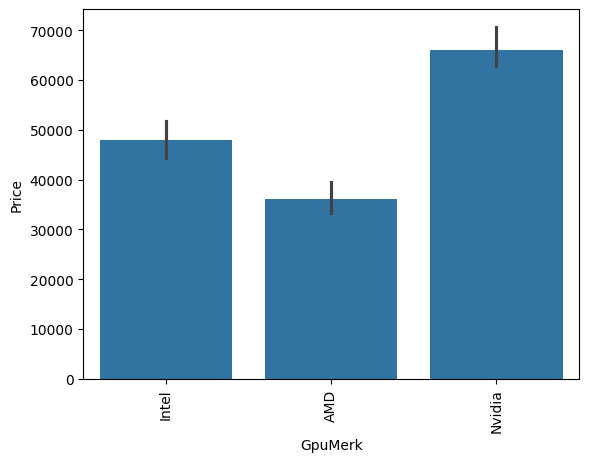

In [797]:
sns.barplot(x=df['GpuMerk'], y=df['Price'], estimator = np.median)
plt.xticks(rotation = 'vertical')
plt.show()

Menghapus data "Gpu", karena sudah tidak dibutuhkan lagi.

In [798]:
df.drop(columns=['Gpu'], inplace=True)

- Mengidentifikasikan data "OpSys" - Operating System.
- Dan didapati dengan jenisnya yang banyak, sehingga perlu dilakukan penyesuaian lagi

In [799]:
df['OpSys'].value_counts()

,count
OpSys,
Windows 10,1072
No OS,66
Linux,62
Windows 7,45
Chrome OS,26
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


Memvisualisasikan hubungan data "OpSys" dan "Price"

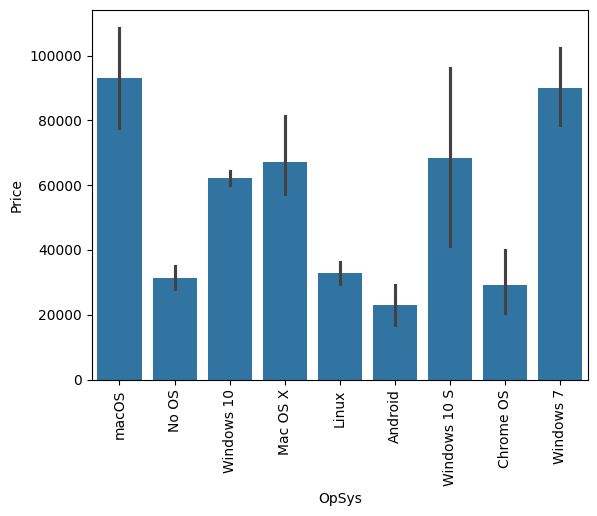

In [800]:
sns.barplot(x=df['OpSys'], y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

Mengkategorikan data "OpSys" dengan membuat colomn baru "CatOs"
- Windows
- Mac
- Linux/Others

In [801]:
def cat_os(inp):
  if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
    return 'Windows'
  elif inp == 'macOS' or inp == 'Mac OS X':
    return 'Mac'
  else:
    return 'Linux/Others'

df['CatOs'] = df['OpSys'].apply(cat_os)
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,CpuMerk,HDD,SSD,GpuMerk,CatOs
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,Intel Core i5,0,256,Intel,Linux/Others
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,Intel Core i5,0,256,Intel,Mac


- Memvisualisasikan hubungan antara data "CatOs" dengan data "Price".
- Didapati laptop dengan Sistem Operasi Mac cenderung harganya lebih mahal daripada laptop dengan sistem operasi Windows atau Linux.

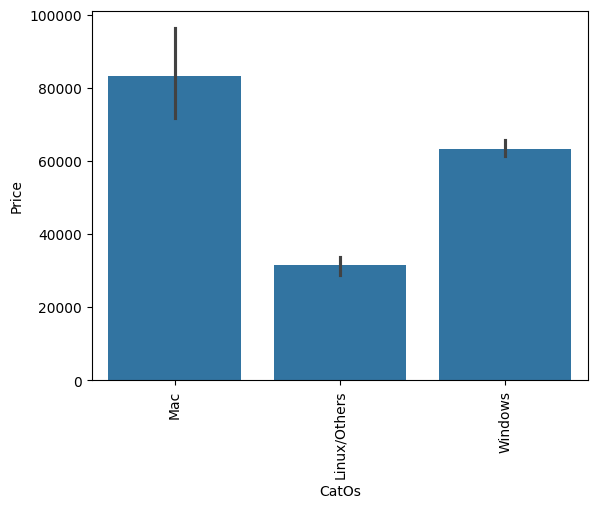

In [802]:
sns.barplot(x=df['CatOs'], y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

Memvisualisasikan hubungan data "Weight" dengan data "Price"

<Axes: xlabel='Weight', ylabel='Price'>

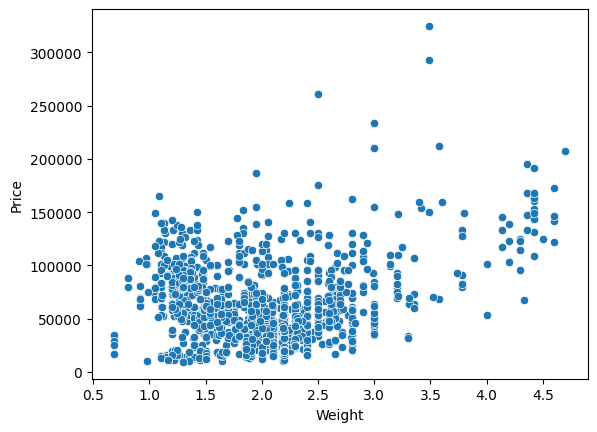

In [803]:
sns.scatterplot(x=df['Weight'], y=df['Price'])

Memvisualisasikan hubungan antar data.

In [804]:
numeric_df = df.select_dtypes(include=np.number)
numeric_df.corr()['Price']

,Price
Ram,0.742905
Weight,0.209867
Price,1.000000
Touchscreen,0.192917
Ips,0.253320
HDD,-0.096891
SSD,0.670660


<Axes: >

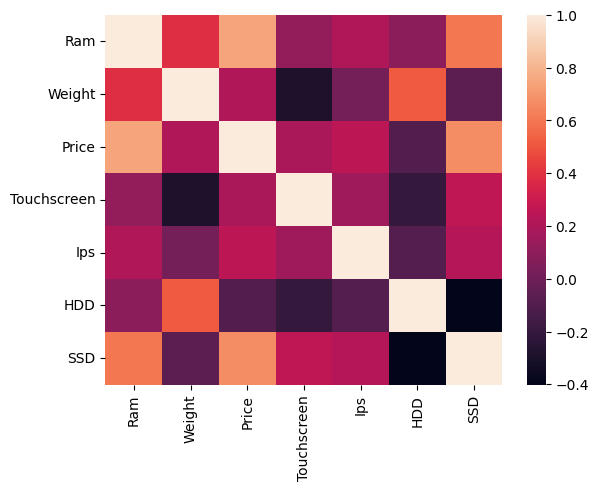

In [805]:
sns.heatmap(numeric_df.corr())

In [806]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   TypeName     1302 non-null   object 
 2   Ram          1302 non-null   int32  
 3   OpSys        1302 non-null   object 
 4   Weight       1302 non-null   float32
 5   Price        1302 non-null   float64
 6   Touchscreen  1302 non-null   int64  
 7   Ips          1302 non-null   int64  
 8   CpuMerk      1302 non-null   object 
 9   HDD          1302 non-null   int64  
 10  SSD          1302 non-null   int64  
 11  GpuMerk      1302 non-null   object 
 12  CatOs        1302 non-null   object 
dtypes: float32(1), float64(1), int32(1), int64(4), object(6)
memory usage: 132.2+ KB


# **Encoding Data Categorical**


- Dikarenakan data masih banyak yang typeya object, maka perlu di encode menjadi data numeric agar dapat diproses dalam modeling.

In [807]:
# Menampilkan jumlah nilai unik dan daftar nilai unik dari setiap kolom bertipe objek (categorical)
categorical_columns = df.select_dtypes(include='object').columns

# Membuat ringkasan isi kategori untuk tiap kolom kategorikal
category_summary = {col: df[col].unique() for col in categorical_columns}
category_summary_count = {col: df[col].value_counts() for col in categorical_columns}

category_summary, category_summary_count

({'Company': array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
         'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
         'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object),
  'TypeName': array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
         'Workstation'], dtype=object),
  'OpSys': array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
         'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object),
  'CpuMerk': array(['Intel Core i5', 'Intel Core i7', 'AMD Processor', 'Intel Core i3',
         'Other Intel Processor'], dtype=object),
  'GpuMerk': array(['Intel', 'AMD', 'Nvidia'], dtype=object),
  'CatOs': array(['Mac', 'Linux/Others', 'Windows'], dtype=object)},
 {'Company': Company
  Dell         297
  Lenovo       297
  HP           274
  Asus         158
  Acer         103
  MSI           54
  Toshiba       48
  Apple         21
  Samsung        8
  Mediacom       7
  Razer     

Encoding yang digunakan adalah tipe "Label Encoding"

In [808]:
from sklearn.preprocessing import LabelEncoder

# Salin dataset agar encoding tidak mengubah aslinya jika dibutuhkan nanti
df_encoded = df.copy()

# Lakukan label encoding untuk semua kolom bertipe kategorikal
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  # Simpan encoder jika nanti perlu inverse_transform

df_encoded.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,CpuMerk,HDD,SSD,GpuMerk,CatOs
0,1,4,8,8,1.37,71378.6832,0,1,2,0,128,1,1
1,1,4,8,8,1.34,47895.5232,0,0,2,0,0,1,1
2,7,3,8,4,1.86,30636.0000,0,0,2,0,256,1,0
3,1,4,16,8,1.83,135195.3360,0,1,3,0,512,0,1
4,1,4,8,8,1.37,96095.8080,0,1,2,0,256,1,1


Hasil dari encoding disimpan di variabel dataframe baru yaitu "df_encoded".

In [809]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   int64  
 1   TypeName     1302 non-null   int64  
 2   Ram          1302 non-null   int32  
 3   OpSys        1302 non-null   int64  
 4   Weight       1302 non-null   float32
 5   Price        1302 non-null   float64
 6   Touchscreen  1302 non-null   int64  
 7   Ips          1302 non-null   int64  
 8   CpuMerk      1302 non-null   int64  
 9   HDD          1302 non-null   int64  
 10  SSD          1302 non-null   int64  
 11  GpuMerk      1302 non-null   int64  
 12  CatOs        1302 non-null   int64  
dtypes: float32(1), float64(1), int32(1), int64(10)
memory usage: 132.2 KB


# **Proses Learning & Modeling (Random Forest)**

Mengimport libary yang diperlukan.

In [810]:
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, confusion_matrix, classification_report

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor

import matplotlib.pyplot as plt

Mengecek dataframe yang sudah bersih.

In [811]:
df_encoded.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,CpuMerk,HDD,SSD,GpuMerk,CatOs
0,1,4,8,8,1.37,71378.6832,0,1,2,0,128,1,1
1,1,4,8,8,1.34,47895.5232,0,0,2,0,0,1,1
2,7,3,8,4,1.86,30636.0000,0,0,2,0,256,1,0
3,1,4,16,8,1.83,135195.3360,0,1,3,0,512,0,1
4,1,4,8,8,1.37,96095.8080,0,1,2,0,256,1,1


In [812]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   int64  
 1   TypeName     1302 non-null   int64  
 2   Ram          1302 non-null   int32  
 3   OpSys        1302 non-null   int64  
 4   Weight       1302 non-null   float32
 5   Price        1302 non-null   float64
 6   Touchscreen  1302 non-null   int64  
 7   Ips          1302 non-null   int64  
 8   CpuMerk      1302 non-null   int64  
 9   HDD          1302 non-null   int64  
 10  SSD          1302 non-null   int64  
 11  GpuMerk      1302 non-null   int64  
 12  CatOs        1302 non-null   int64  
dtypes: float32(1), float64(1), int32(1), int64(10)
memory usage: 132.2 KB


- Menampilkan jumlah nilai unik dan daftar nilai unik dari setiap kolom bertipe objek (categorical)
- Membuat ringkasan isi kategori untuk tiap kolom kategorikal


In [813]:
categorical_columns = df_encoded.select_dtypes(include='int64').columns

category_summary = {col: df_encoded[col].unique() for col in categorical_columns}
category_summary_count = {col: df_encoded[col].value_counts() for col in categorical_columns}

category_summary, category_summary_count

({'Company': array([ 1,  7,  0,  2,  4, 10,  3, 11, 13, 16,  8, 18, 17, 14, 12, 15,  6,
          5,  9]),
  'TypeName': array([4, 3, 2, 1, 0, 5]),
  'OpSys': array([8, 4, 5, 3, 2, 0, 6, 1, 7]),
  'Touchscreen': array([0, 1]),
  'Ips': array([1, 0]),
  'CpuMerk': array([2, 3, 0, 1, 4]),
  'HDD': array([   0,  500, 1000, 2000,   32,  128]),
  'SSD': array([ 128,    0,  256,  512,   32,   64, 1000, 1024,   16,  768,  180,
          240,    8]),
  'GpuMerk': array([1, 0, 2]),
  'CatOs': array([1, 0, 2])},
 {'Company': Company
  4     297
  10    297
  7     274
  2     158
  0     103
  11     54
  16     48
  1      21
  15      8
  12      7
  14      7
  13      6
  17      4
  18      4
  3       3
  5       3
  6       3
  9       3
  8       2
  Name: count, dtype: int64,
  'TypeName': TypeName
  3    727
  1    205
  4    196
  0    120
  5     29
  2     25
  Name: count, dtype: int64,
  'OpSys': OpSys
  5    1072
  4      66
  2      62
  7      45
  1      26
  8      13
  3    

Membuat variabel untuk data Train dan Test.

In [814]:
X = df_encoded.drop(columns=['Price'])
y = np.log(df_encoded['Price'])

categorical_features = ['Company', 'TypeName', 'CpuMerk', 'GpuMerk', 'OpSys', 'CatOs']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', list(X.select_dtypes(include=np.number).columns)),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)
    ])

In [815]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=2)

In [816]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_processed, y_train)
rf_predictions = rf_model.predict(X_test_processed)
rf_r2 = r2_score(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)

# **Performal Model (Random Forest)**

In [817]:
# Print the evaluation results
print("R2 Score for Random Forest: {:.4f}".format(rf_r2))
print("Mean Absolute Error for Random Forest: {:.4f}".format(rf_mae))
print("Mean Squared Error for Random Forest: {:.4f}".format(rf_mse))

R2 Score for Random Forest: 0.8826
Mean Absolute Error for Random Forest: 0.1568
Mean Squared Error for Random Forest: 0.0449


Visualisasi hasil model Random Forest

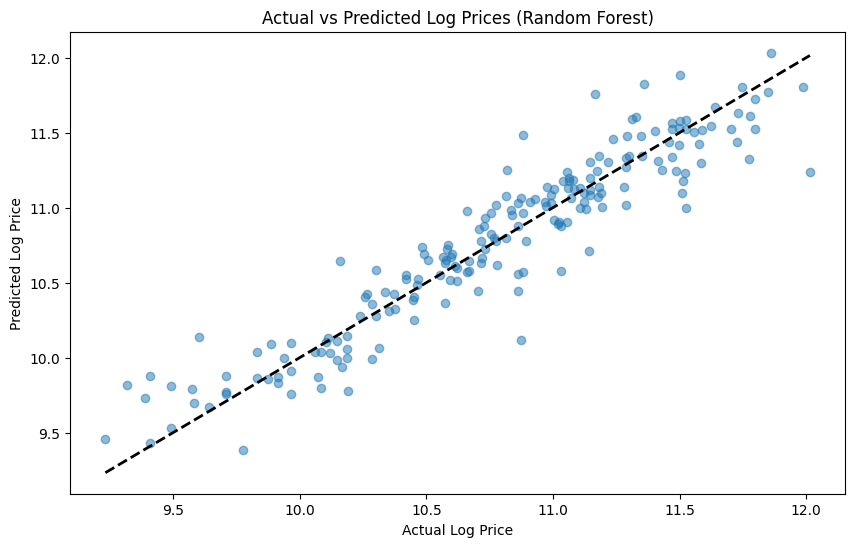

In [818]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Add a diagonal line for reference
plt.xlabel("Actual Log Price")
plt.ylabel("Predicted Log Price")
plt.title("Actual vs Predicted Log Prices (Random Forest)")
plt.show()

In [819]:
# prompt: Mencoba prediksi estimasi harga dari model menggunakan Random Forest

# Mencoba prediksi estimasi harga dari model menggunakan Random Forest

# Evaluate the Random Forest model
print("\nRandom Forest Model Evaluation:")
print("R2 Score:", rf_r2)
print("Mean Absolute Error:", rf_mae)
print("Mean Squared Error:", rf_mse)


Random Forest Model Evaluation:
R2 Score: 0.8826014114847703
Mean Absolute Error: 0.15676725219854606
Mean Squared Error: 0.044910961490440965


In [820]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   int64  
 1   TypeName     1302 non-null   int64  
 2   Ram          1302 non-null   int32  
 3   OpSys        1302 non-null   int64  
 4   Weight       1302 non-null   float32
 5   Price        1302 non-null   float64
 6   Touchscreen  1302 non-null   int64  
 7   Ips          1302 non-null   int64  
 8   CpuMerk      1302 non-null   int64  
 9   HDD          1302 non-null   int64  
 10  SSD          1302 non-null   int64  
 11  GpuMerk      1302 non-null   int64  
 12  CatOs        1302 non-null   int64  
dtypes: float32(1), float64(1), int32(1), int64(10)
memory usage: 132.2 KB


- Uji coba dengan data dummy (data dummy yang dicoba disesuikan dengan data pertama).
- Untuk data pertama (index 0) memiliki price 71.378,6832 Rupee atau seharga Rp 13.505.560,65.
- Dari hasil prediksi menunjukkan 68.517,25 Rupee atau Rp 12.879.873,35


In [821]:
# dummy_data = {
#     'Company': [1],
#     'TypeName': [4],
#     'Ram': [8],
#     'Weight': [1.37],
#     'Touchscreen': [0],
#     'Ips': [1],
#     'CpuMerk': [2],
#     'HDD': [0],
#     'SSD': [128],
#     'GpuMerk': [1],
#     'OpSys': [1],
#     'CatOs': [0]
# }


dummy_data = df_encoded.iloc[0]

dummy_df = pd.DataFrame(dummy_data).T

dummy_df_processed = preprocessor.transform(dummy_df)

dummy_prediction_log = rf_model.predict(dummy_df_processed)

kurs_rupee_to_rupiah = 187.98
dummy_prediction_price = np.exp(dummy_prediction_log)
harga_rupiah = dummy_prediction_price[0] * kurs_rupee_to_rupiah

print(f"Estimasi harga laptop dummy: {dummy_prediction_price[0]:,.2f} Rupee")
print(f"\nEstimasi harga laptop dummy: Rp {harga_rupiah:,.2f}")

Estimasi harga laptop dummy: 68,517.25 Rupee

Estimasi harga laptop dummy: Rp 12,879,873.35


# **Diskusi Hasil & Kesimpulan**

#Diskusi Hasil
Dari Eksperimen yang telah dilakukan hasil akhir yang akan didapatkan adalah berupa formulasi untuk melakukan proses prediksi harga Laptop berdasarkan Spesifikasinya.

Model Random Forest menunjukkan performa yang sangat bagus dengan rincian:
- *R2 Score*: 0.8826
- *Mean Absolute Error*: 0.1568
- *Mean Squared Error*: 0.0449


Saat ditest menggunakan data dummy, yang mana data dummy tersebut diambil dari data index ke-0 (data pada baris pertama), dengan rincian spesifikasi sebagai berikut:


In [822]:
print("Detail Data Baris Pertama:")
df.iloc[0]

Detail Data Baris Pertama:


,0
Company,Apple
TypeName,Ultrabook
Ram,8
OpSys,macOS
Weight,1.37
Price,71378.6832
Touchscreen,0
Ips,1
CpuMerk,Intel Core i5
HDD,0


- Untuk data pertama ini memiliki "price" 71.378,6832 Rupee atau seharga Rp 13.505.560,65

- Kemudian saat diuji coba, untuk diprediksi, menunjukkan hasil sebagai berikut:

In [823]:
print(f"Estimasi harga laptop dummy: {dummy_prediction_price[0]:,.2f} Rupee")
print(f"\nEstimasi harga laptop dummy: Rp {harga_rupiah:,.2f}")

Estimasi harga laptop dummy: 68,517.25 Rupee

Estimasi harga laptop dummy: Rp 12,879,873.35


- Dari hasil sudah sangat jelas menunjukkan harganya 68.517,25 Rupee atau Rp 12.879.873,35
- Dan hasil ini tidak jauh berbeda dengan data yang aslinya (Tidak lebih dari Rp 1.000.000,00 selisihnya).

#Kesimpulan
Sehingga dapat disimpulkan bahwa dengan menggunakan model *Random Forest* ini berhasil memprediksi harga laptop berdasarkan spesifikasinya dengan **hasil yang memuaskan** karena **tidak menunjukkan Gap atau selisih yang sangat jauh** antara data yang asli dengan data dummy yang di test.